In [1]:
# load the dataset

import pandas as pd

df = pd.read_csv("Donald Trumps Facebook Statuses.csv")
df.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,Beautiful evening in Wisconsin- THANK YOU for ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,The State Department's quid pro quo scheme pro...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,Crooked Hillary's State Department colluded wi...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,"JournoCash: Media gives $382,000 to Clinton, $...","JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,"Exclusive: ""O'Keefe Video Sting Exposes 'Bird-...",O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0


In [2]:
# print basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         4539 non-null   object 
 1   status_message    3794 non-null   object 
 2   link_name         2715 non-null   object 
 3   status_type       4160 non-null   object 
 4   status_link       2983 non-null   object 
 5   status_published  4160 non-null   object 
 6   num_reactions     4160 non-null   float64
 7   num_comments      4160 non-null   float64
 8   num_shares        4160 non-null   float64
 9   num_likes         4160 non-null   float64
 10  num_loves         4160 non-null   float64
 11  num_wows          4160 non-null   float64
 12  num_hahas         4160 non-null   float64
 13  num_sads          4160 non-null   float64
 14  num_angrys        4159 non-null   float64
dtypes: float64(9), object(6)
memory usage: 532.2+ KB


In [6]:
df.shape

(4539, 15)

We can see a lot of null values in the dataset. I would assume that posts where the number of loves, wows, sads, etc. is NaN, those are the posts that have 0 count of such reactions. For now, I don't see a reason why we may want to delete some rows where specific column is null, thus I will keep the dataset as it is.

<h4>Tasks</h4>

1. Use charts (histogram/bar graph) to display the distribution of types of statuses (photo, video, link, and status).

In [7]:
df.status_type.value_counts()

photo                    1539
status                   1177
link                      763
video                     679
http://bit.ly/2duCRlw       1
event                       1
Name: status_type, dtype: int64

In [9]:
# subset the dataset to include only first 4 types of statuses

df1 = df[(df.status_type != 'event') & (df.status_type != 'http://bit.ly/2duCRlw')]

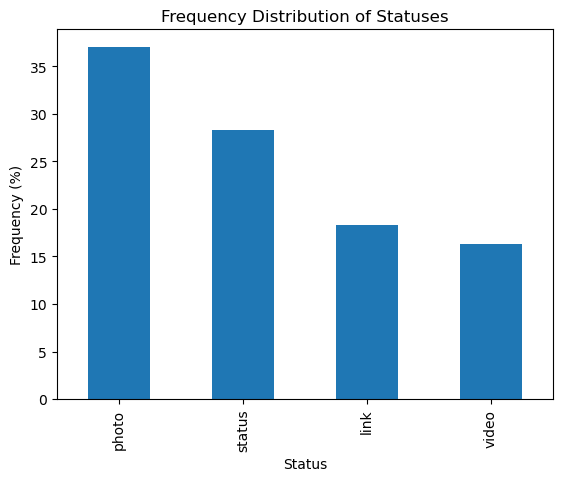

In [14]:
import matplotlib.pyplot as plt

freq = df1.status_type.value_counts(normalize=True) * 100

freq.plot(kind='bar')

# add labels and title
plt.xlabel('Status')
plt.ylabel('Frequency (%)')
plt.title('Frequency Distribution of Statuses')

# display the plot
plt.show()

2. Plot a chart showing the progression of likes, loves, and sads, and angrys over time.

In [24]:
df['status_published'] = pd.to_datetime(df['status_published'], infer_datetime_format=True, errors='coerce')

In [28]:
df2 = df[df.status_published.notnull()]

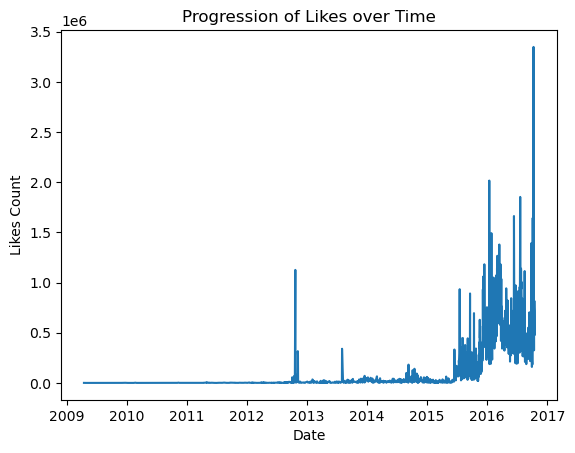

In [32]:
likes_counts = df.groupby(df['status_published'].dt.date)['num_likes'].sum()

likes_counts.plot()
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Progression of Likes over Time')

plt.show()

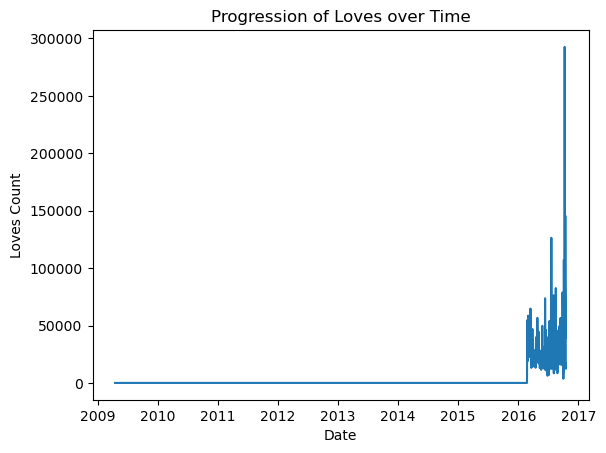

In [34]:
loves_counts = df.groupby(df['status_published'].dt.date)['num_loves'].sum()

loves_counts.plot()
plt.xlabel('Date')
plt.ylabel('Loves Count')
plt.title('Progression of Loves over Time')

plt.show()

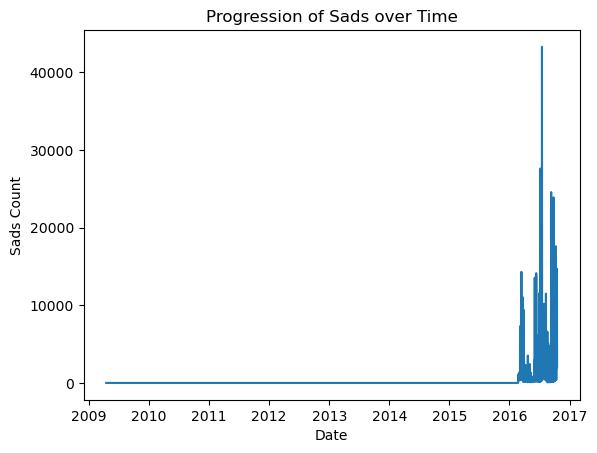

In [35]:
sads_counts = df.groupby(df['status_published'].dt.date)['num_sads'].sum()

sads_counts.plot()
plt.xlabel('Date')
plt.ylabel('Sads Count')
plt.title('Progression of Sads over Time')

plt.show()

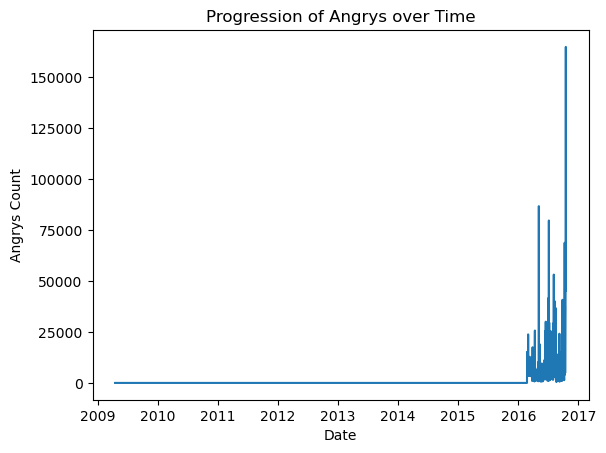

In [37]:
angrys_counts = df.groupby(df['status_published'].dt.date)['num_angrys'].sum()

angrys_counts.plot()
plt.xlabel('Date')
plt.ylabel('Angrys Count')
plt.title('Progression of Angrys over Time')

plt.show()

3. What are the top reactions expressed by Trump’s Facebook audience?

In [44]:
counts = []
reactions = ['num_likes', 'num_loves', 'num_sads', 'num_wows', 'num_hahas', 'num_angrys']
for i in reactions:
    counts.append(df[i].sum())

for item1, item2 in zip(reactions, counts):
    print(f'{item1:<10} {item2:>5}')
    
# we can see that number of likes was the top reaction

num_likes  220676633.0
num_loves  7706103.0
num_sads   540360.0
num_wows   695447.0
num_hahas  1687937.0
num_angrys 2269144.0


In [39]:
# we may also want to see how status type correlates with reation type

top_reactions = df1.groupby('status_type')[['num_likes', 'num_loves', 'num_sads', 'num_wows', 'num_hahas', 'num_angrys']].sum()

top_reactions

,num_likes,num_loves,num_sads,num_wows,num_hahas,num_angrys
status_type,,,,,,
link,35355909.0,1104220.0,52268.0,194330.0,265793.0,618407.0
photo,78289794.0,2972847.0,145908.0,257068.0,431784.0,528155.0
status,73638484.0,1595974.0,292014.0,116212.0,590486.0,695103.0
video,33385295.0,2033019.0,50102.0,127664.0,399872.0,427479.0


4. Analyze the content in the status_message to find the top 10 topics (Topic modeling LDA can be used). Can you tell if fans are particularly happy or upset about the topics?

In [45]:
# before performing LDA, we should clean data

import re
import nltk
import string
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from gensim.models import Phrases


def cleaning(text):
    remove = re.compile(r'')
    itemlist = re.sub(remove, '', str(text)) # delete tags
    
    itemlist = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', "", itemlist)  # delete urls
    itemlist = [html.unescape(s) for s in itemlist] #remove html tags and attributes
    
    itemlist = [s.encode('ascii', 'ignore') for s in itemlist] #convert to ascii
    itemlist = [s.decode('ascii') for s in itemlist] # deconvert
    
    itemlist = [s.replace('\n',' ') for s in itemlist] #remove \n in strings
    itemlist = [s.replace('\r','') for s in itemlist]  # remove \r in strings
    itemlist = [s.replace('\\n',' ') for s in itemlist] #remove \\n in strings
    itemlist = [re.sub('[0-9]+', '', s) for s in itemlist] #remove numbers
    
    itemlist = [s.lower() for s in itemlist] #lower case
    
    return "".join(itemlist)


def preprocess(text):
    
    text_tokens = word_tokenize(text)
    tokens_without_punc = [word.lower() for word in text_tokens if word.isalnum()] # delete all punctuation marks
    
    # lemmatize 
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens_without_punc] # lemmatize words without pos tags
    
    tokens_without_sw = [word for word in lemmatized if not word in stopwords.words('english')] # delete stopwords
    
    # find collocations and set them as separate phrases
    text_clean = tokens_without_sw
    
    bigram = Phrases(text_clean) # bigrams
    trigram = Phrases(bigram[text_clean]) # trigrams

    for idx in range(len(text_clean)):
        for token in bigram[text_clean[idx]]:
            if '_' in token:
                text_clean[idx].append(token)
        for token in trigram[text_clean[idx]]:
            if '_' in token:
                text_clean[idx].append(token)
    
    return ' '.join(text_clean)

In [46]:
# filter the dataset where status_message is not empty and is longer than 30 characters
# in this case, we exclude instances where the message is too short

df3 = df[df['status_message'].notnull()]
df3 = df3[df3['status_message'].str.len() > 30]
df3.shape

(3626, 15)

In [47]:
df3["status_processed"] = df3.status_message.apply(cleaning).apply(preprocess)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# vectorize the data
my_stop_words = ['wa', 'ha', 'pm']
stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + my_stop_words

vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df3['status_processed'])

# train the LDA model
lda_model = LatentDirichletAllocation(n_components=10, max_iter=200, random_state=42)
lda_model.fit(X)

LatentDirichletAllocation(max_iter=200, random_state=42)

In [78]:
# print LDA topics in a nice way

def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names()
    topics = []
    for i, topic in enumerate(model.components_):
        topics.append([words[i] for i in topic.argsort()[:-top_n - 1:-1]])
    
    # convert topics to a pandas DataFrame for good formatting
    df = pd.DataFrame(topics)
    df.index.name = 'Topic'
    df.index = df.index
    df.columns = ['Word {}'.format(i) for i in range(1, top_n+1)]
    pd.options.display.max_colwidth = 100
    
    return df

In [83]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

topics = print_topics(lda_model, vectorizer)
topics

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic,,,,,,,,,,
0,trump,donald,republican,campaign,today,governor,new,tower,delegate,makeamericagreatagain
1,great,america,thank,make,support,vote,safe,new,let,trump
2,apprentice,nbc,time,watch,celebrity,tonight,live,celebapprentice,new,night
3,trump,new,hotel,york,veteran,hero,student,international,president,obama
4,john,michael,david,james,robert,thomas,richard,william,paul,charles
5,job,american,country,new,america,going,state,trade,clinton,people
6,thank,trump,great,makeamericagreatagain,today,honor,silent,thought,officer,iowa
7,hillary,clinton,people,country,crooked,american,want,president,time,going
8,golf,trump,miss,watch,tonight,course,great,scotland,really,universe


We can see that overall people are happy about the topic, since we don't see any negative words in the topics generated by LDA. Moreover, words that indicate positive relation are happy, "make America great again", great, thank, hero.

In [80]:
# assign topic to each row

# get the topic probabilities for each row in the dataset
row_topic_probs = lda_model.transform(X)

row_topic_assignments = np.argmax(row_topic_probs, axis=1)

# add the topic assignments as a new column to the original dataframe
df3['topic'] = row_topic_assignments

In [82]:
df3.topic.value_counts()

1    965
7    716
5    421
9    351
6    285
0    241
2    233
8    225
3    153
4     36
Name: topic, dtype: int64

5. What are the themes (topics or top words) that generated a lot of shares?

In [85]:
topic_counts = df3['topic'].value_counts()

most_popular_topic = topic_counts.index[0]

print("Most popular topic: {}".format(most_popular_topic), "\n")
print(topics.loc[most_popular_topic])

Most popular topic: 1 

Word 1       great
Word 2     america
Word 3       thank
Word 4        make
Word 5     support
Word 6        vote
Word 7        safe
Word 8         new
Word 9         let
Word 10      trump
Name: 1, dtype: object


6. What are the themes (topics or top words) that generated a lot of num_reactions?

In [92]:
topic_reactions = df3.groupby('topic')['num_reactions'].sum()

print("Top topic: {}, sum of reactions: {}".format(topic_reactions.idxmax(), topic_reactions[topic_reactions.idxmax()]))

Top topic: 1, sum of reactions: 72598834.0
